# Programming Exercise 7 - K-means Clustering and Principal Component Analysis

In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images. Before starting on the programming exercise, we strongly recommend watch- ing the video lectures and completing the review questions for the associated topics.

# K-means Clustering

In this this exercise, you will implement the K-means algorithm and use it for image compression. You will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib as mpl
import seaborn as sns
sns.set(context="notebook", style="white")

## Implementing K-means

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few cohesive “clusters”. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:

```Python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)

    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

The inner-loop of the algorithm repeatedly carries out two steps: (1) Assigning each training example $x^{(i)}$ to its closest centroid, and (2) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion). You will implement the two phases of the K-means algorithm separately in the next sections.

### Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set

$$c^{(i)} := j \quad \text{that minimizes} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to idx[i] in the starter code.

Your task is to complete the code in the function findClosestCentroids. This function takes the data matrix X and the locations of all centroids inside centroids and should output a one-dimensional array idx that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

You can implement this using a loop over every training example and every centroid.

In [2]:
def findClosestCentroids(X, centroids):
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)
    
    m = X.shape[0]
    
    for i in range(m):
        min_dist = np.inf
        for j in range(K):
            dist = np.linalg.norm(X[i,:] - centroids[j,:], axis=0)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
            
    return idx

Once you have completed the code in findClosestCentroids, the following cell will run your code and you should see the output  [0 2 1] corresponding to the centroid assignments for the first 3 examples.

In [3]:
# Load an example dataset that we will be using
data = loadmat('data/ex7data2.mat')
X = data['X']

# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


### Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$
where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

You should now complete the code in the function computeCentroids. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [4]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx.ravel() == k, :], axis=0)
    
    return centroids

Once you have completed the code in computeCentroids, the following cell will run your code and output the centroids after the first step of K-means.

In [5]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


## K-means on example dataset

After you have completed the two functions (findClosestCentroids and computeCentroids), you have all the necessary pieces to run the K-means algorithm. The next cell will run the K-means algorithm on a toy 2D dataset to help you understand how K-means works.

In [6]:
def runKMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        print('K-Means iteration {}/{}...'.format(i + 1, max_iters))
        
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)
    
    return idx, centroids

In [7]:
idx, centroids = runKMeans(X, initial_centroids, 10)

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


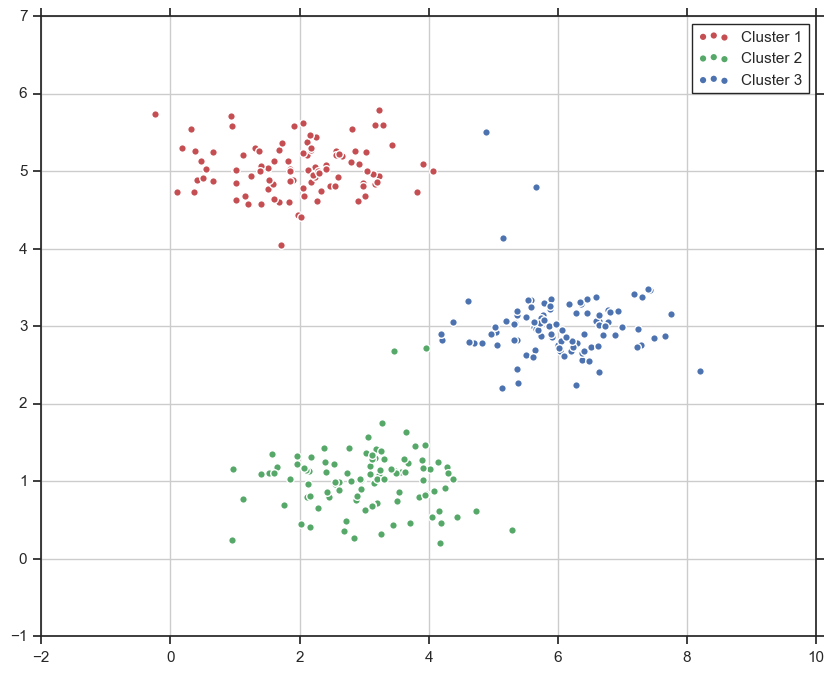

In [8]:
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

plt.figure(figsize=(10, 8))
plt.scatter(cluster1[:, 0], cluster1[:, 1], s=30, c='r', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], s=30, c='g', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], s=30, c='b', label='Cluster 3')

plt.grid(True)
plt.legend(loc=0)
plt.show()

## Random initialization

The initial assignments of centroids for the example dataset in the previous cell were designed so that you will see the same figure as that shown in the cell above. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In this part of the exercise, you should complete the function kMeansInitCentroids with the following code:

```Python
# Initialize the centroids to be random examples

# Randomly reorder the indices of examples
randidx = np.random.permutation(X.shape[0])
# Take the first K examples as centroids
centroids = X[randidx[:K], :]
```

The code above first randomly permutes the indices of the examples (using permute within the numpy.random module). Then, it selects the first $K$ examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.



In [9]:
def kMeansInitCentroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    
    return centroids

In [10]:
random_inin_centroids = kMeansInitCentroids(X, 3)
random_inin_centroids

array([[ 4.30471138,  1.10725995],
       [ 7.4949275 ,  2.84018754],
       [ 4.20584789,  2.81647368]])

## Image compression with K-means

In this exercise, you will apply K-means to image compression. We will use the image below as an example (property of Frank Wouters with permission to this class).

![](https://github.com/dibgerge/ml-coursera-python-assignments/raw/39fc8fc2447d6283fdd07bf9c9785943bbad1034/Exercise7/Data/bird_small.png)

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often referred to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

### K-means on pixels

In python, images can be read in as follows:

```Python
img = mpl.image.imread('data/bird_small.png')
```
This creates a three-dimensional matrix A whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A[50, 33, 2] gives the blue intensity of the pixel at row 51 and column 34.

The code in the following cell first loads the image, and then reshapes it to create an m x 3 matrix of pixel colors (where m = 16384 = 128 x 128), and calls your K-means function on it.

After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the findClosestCentroids function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the 128 x 128 pixel locations, resulting in total size of 128 x 128 x 24 = 393,216 bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore 16 x 24 + 128 x 128 x 4 = 65,920 bits, which corresponds to compressing the original image by about a factor of 6.

Finally, you can view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace each pixel location with the mean of the centroid assigned to it.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


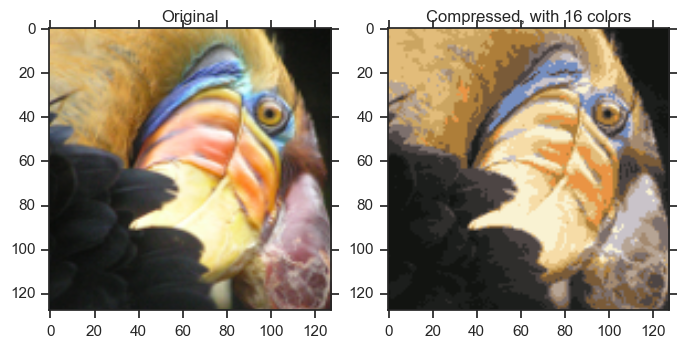

In [11]:
# You should try different values for those parameters
K = 16
max_iters = 10


# Load an image of a bird
# Change the file name and path to experiment with your own images
img = mpl.image.imread('data/bird_small.png')
# ==========================================================

# Divide by 255 so that all values are in the range 0 - 1
img = img / 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
img_reshaped = img.reshape(-1, 3)

# When using K-Means, it is important to randomly initialize centroids
# You should complete the code in kMeansInitCentroids above before proceeding
initial_centroids = kMeansInitCentroids(img_reshaped, K)

# Run K-Means

idx, centroids = runKMeans(img_reshaped, initial_centroids, max_iters)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
img_recovered = centroids[idx, :].reshape(img.shape)

# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img * 255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(img_recovered * 255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

## Implement K-means using scikit-learn

In [12]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(img_reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(img_reshaped)
print(C.shape)

print(centroids[C].shape)

(16, 3)
(16384,)
(16384, 3)


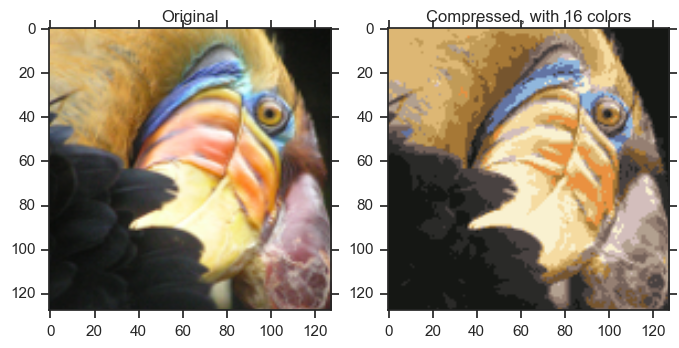

In [14]:
compressed_pic = centroids[C].reshape((128,128,3))

# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img * 255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(compressed_pic * 255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

# Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

## Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [15]:
data2 = loadmat('data/ex7data1.mat')
X2 = data2['X']

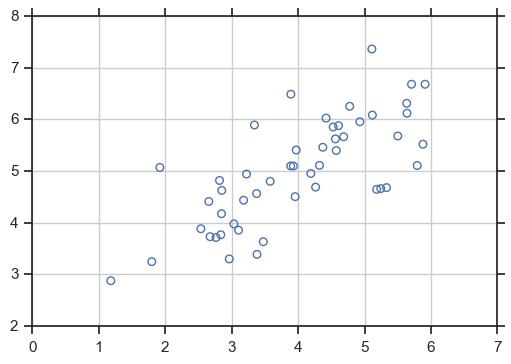

In [16]:
def plotData(X):
    plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='b', facecolors='none')
    plt.grid(True)
    
plotData(X2)

## Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps:

1. Compute the covariance matrix of the data.
2. Use SVD (in python we use numpy's implementation np.linalg.svd) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.
First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$
where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and numpy (or scipy), you can run SVD with the following command: U, S, V = np.linalg.svd(Sigma), where U will contain the principal components and S will contain a diagonal matrix. Note that the scipy library also has a similar function to compute SVD scipy.linalg.svd. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the scipy version provides more options and arguments to control SVD computation. In this exercise, we will stick with the numpy implementation of SVD.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. Complete the code in the following cell to implemente PCA. 

In [17]:
def pca(X):
    
    # make sure to normalize data before appling PCA
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    # covariance matrix
    Sigma = np.dot(X_norm.T, X_norm) / X_norm.shape[0]
    
    U, S, V = np.linalg.svd(Sigma)
    
    return X_norm, mu, sigma, U, S, V

In [18]:
X_norm, mu, sigma, U, S, V = pca(X2)

print(U[:, 0])
print('(expected to see -0.707107 -0.707107)')

[-0.70710678 -0.70710678]
(expected to see -0.707107 -0.707107)


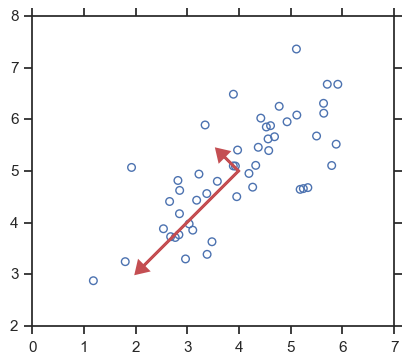

In [19]:
plotData(X2)

for i in range(2):
    plt.arrow(mu[0], mu[1], 1.5 * S[i] * U[0, i], 1.5 * S[i] * U[1, i],
         head_width=0.25, head_length=0.2, facecolor='r', edgecolor='r', linewidth=2, zorder=1000)

# setting aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
plt.gca().set_aspect('equal')
plt.grid(False)

## Dimensionality Reduction with PCA

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

### Projecting the data onto the principal components

You should now complete the code in the function projectData. Specifically, you are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K. You should project each example in X onto the top K components in U. Note that the top K components in U are given by the first K columns of U, that is Ureduce = U[:, :K].

In [20]:
def projectData(X, U, K):
    Ureduce = U[:, :K]
    
    Z = np.dot(X, Ureduce)
    
    return Z

Once you have completed the code in projectData, the following cell will project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

In [21]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.496313
(this value should be about    : 1.481274)


### Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function recoverData to project each example in Z back onto the original space and return the recovered approximation in Xrec.

In [22]:
def recoverData(Z, U, K):
    Ureduce = U[:, :K]
    Xrec = np.dot(Z, Ureduce.T)
    
    return Xrec

Once you have completed the code in recoverData, the following cell will recover an approximation of the first example and you should see a value of about [-1.047 -1.047]. 

In [23]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.047419 -1.047419])


### Visualizing the projections

The code below will plot the data in this reduced dimension space. This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it. 

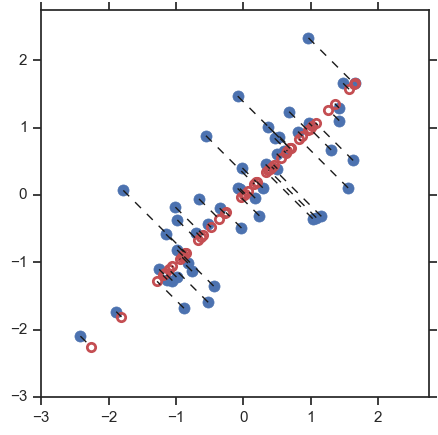

In [24]:
#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

In the figure above, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$. The dotted lines show the distance from the data points in original space to the projected space. Those dotted lines represent the error measure due to PCA projection.

## Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset X of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild dataset](http://vis-www.cs.umass.edu/lfw/). Each row of X corresponds to one face image (a row vector of length 1024).

The next cell will load and visualize the first 100 of these face images:

In [25]:
face_data = loadmat('data/ex7faces.mat')
face_X = face_data['X']
face_X.shape

(5000, 1024)

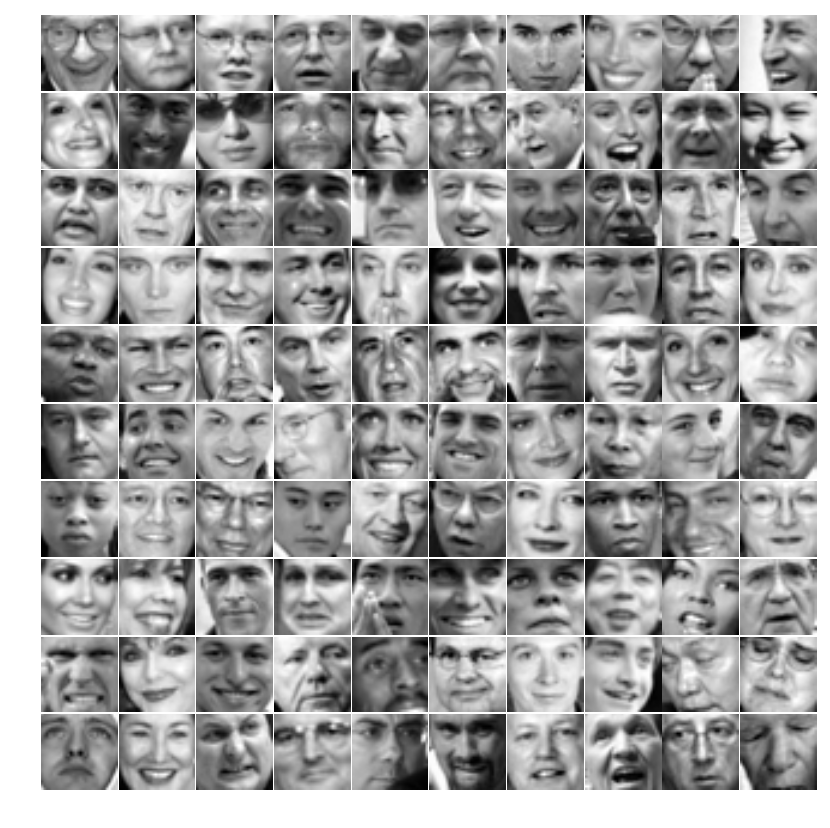

In [26]:
def displayData(X, figsize=(10, 10)):
    m, n = X.shape

    example_width = int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

displayData(face_X[: 100, :])        

### PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix X. After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in U (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset.

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

In [27]:
face_X_norm, face_mu, face_sigma, face_U, face_S, face_V = pca(face_X)

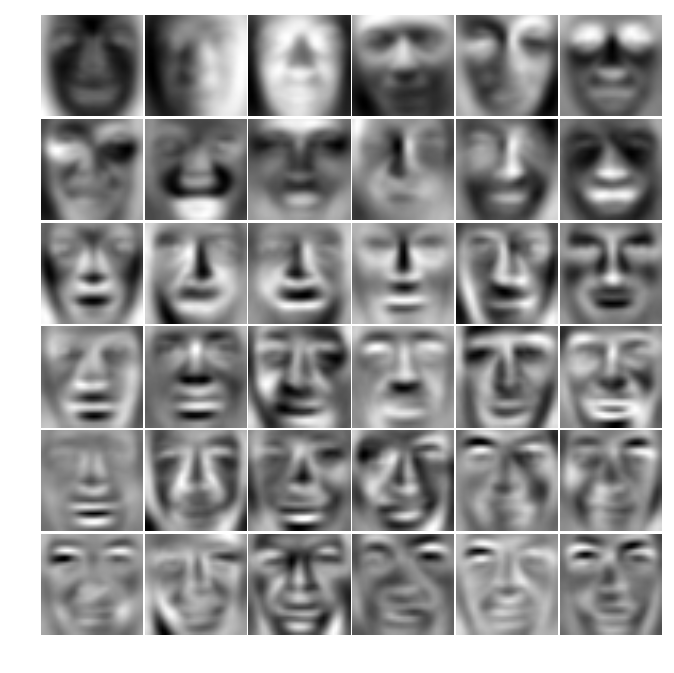

In [28]:
displayData(face_U[:, :36].T, figsize=(8, 8))

### Dimensionality Reduction

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [29]:
face_K = 100

face_Z = projectData(face_X_norm, face_U, face_K)

print('The projected data Z has a shape of: ', face_Z.shape)

The projected data Z has a shape of:  (5000, 100)


In the next cell, you are going to apply function recoverData to approximately recover the projected face images.

In [30]:
face_X_rec = recoverData(face_Z, face_U, face_K)

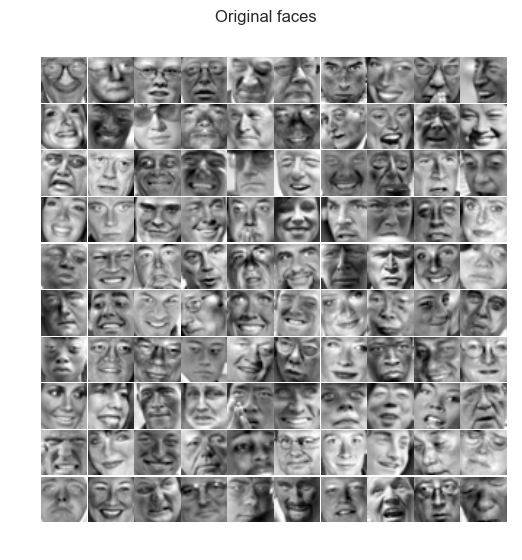

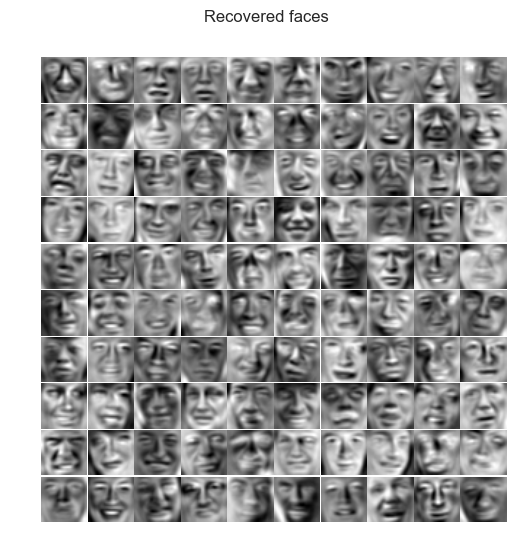

In [31]:
displayData(face_X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

displayData(face_X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

## PCA for visualization

In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. We reduced each pixel of the RGB image to be represented by 16 clusters. In the next cell, we have provided code to visualize the final pixel assignments in this 3D space. Each data point is colored according to the cluster it has been assigned to. Mouse can be used on the interactive plotly figure in a Jupyter Notebook to rotate, zoom and inspect this data in 3 dimensions.

In [32]:
import plotly
import plotly.graph_objs as go
import matplotlib.cm

plotly.offline.init_notebook_mode(connected=True)

# Setup color palette.
colors = np.array([matplotlib.cm.get_cmap('rainbow')(float(i) / 10) for i in idx])

# Visualize the data and centroid memberships in 3D.
trace = go.Scatter3d(x=img_reshaped[:,0], y=img_reshaped[:,1], z=img_reshaped[:,2],
                      mode='markers',
                      marker=dict(size=1.5, color=colors, opacity=0.3))

plotly.offline.iplot({'data': [trace],
                      'layout': {'title': 'Original data in 3D'}})

It turns out that visualizing datasets in 3 dimensions or greater can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes. Next PCA will be applied to the 3-dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the “best” view.

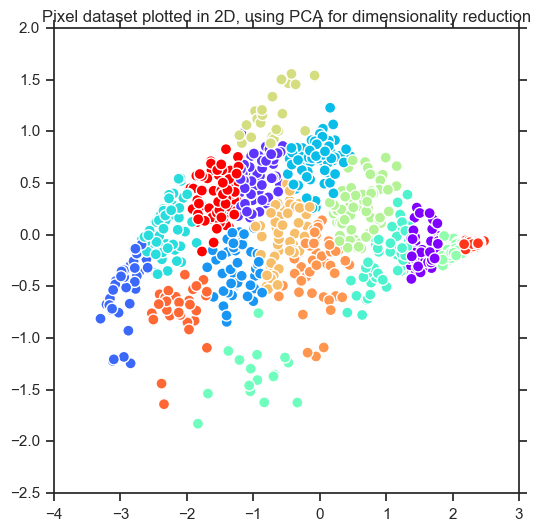

In [35]:
# Apply PCA and project the data to 2D.
img_norm, img_mu, img_std, img_U, img_S, img_V = pca(img_reshaped)
img_Z = projectData(img_norm, img_U, 2)

# Plot in 2D.
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

sel = np.random.choice(img_reshaped.shape[0], size=1000)
ax.scatter(img_Z[sel, 0], img_Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)